##<center><strong>Import Necessary Libraries and Loading of Data Set</strong></center>

---
**Also include head to visualize dataset and its columns**



In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [17]:
cyber_attack_df = pd.read_csv('./content/cyber_attacks.csv')
X = cyber_attack_df[cyber_attack_df.columns[:-1]]
df = pd.DataFrame(X, columns=cyber_attack_df.columns[:-1])
y= cyber_attack_df['attack_type']

cyber_attack_df.head()

,protocol_type,duration,src_bytes,dst_bytes,num_packets,num_connections,attack_type
0,1,43.418651,1701.411601,201.794741,42,15,Botnet
1,1,8.587924,409.971403,710.745376,17,6,Normal
2,1,4.386891,418.478693,559.457816,17,5,Normal
3,0,NaN,NaN,NaN,11,3,Normal
4,0,1.061892,494.253699,572.459614,11,3,Normal


#<center><strong>Data Preprocessing</strong></center>

---

***Include***

1.   Mean Imputation Filling of empty data (500/10,000 is 5% of data. Decision to leave out null data due to inviability of data replacement techniques)



##Viewing of Dataset information to identify Data preprocessing targets

In [18]:
#Data Preprocessing block
cyber_attack_df.info()
cyber_attack_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   protocol_type    10000 non-null  int64  
 1   duration         9500 non-null   float64
 2   src_bytes        9500 non-null   float64
 3   dst_bytes        9500 non-null   float64
 4   num_packets      10000 non-null  int64  
 5   num_connections  10000 non-null  int64  
 6   attack_type      10000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


protocol_type        0
duration           500
src_bytes          500
dst_bytes          500
num_packets          0
num_connections      0
attack_type          0
dtype: int64

##Filling of Rows using mean imputation based on attack type

In [19]:
# ##Mean imputation based on attack_type

# %%
# Group by 'attack_type' and calculate the mean for each group
attack_type_means = cyber_attack_df.groupby('attack_type').mean()

# Fill NaN values using the means for each attack type
for attack_type in attack_type_means.index:
    cyber_attack_df[cyber_attack_df['attack_type'] == attack_type] = cyber_attack_df[cyber_attack_df['attack_type'] == attack_type].fillna(attack_type_means.loc[attack_type])

cyber_attack_df.info()
cyber_attack_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   protocol_type    10000 non-null  int64  
 1   duration         10000 non-null  float64
 2   src_bytes        10000 non-null  float64
 3   dst_bytes        10000 non-null  float64
 4   num_packets      10000 non-null  int64  
 5   num_connections  10000 non-null  int64  
 6   attack_type      10000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


protocol_type      0
duration           0
src_bytes          0
dst_bytes          0
num_packets        0
num_connections    0
attack_type        0
dtype: int64

##**Final Look at data set before training Random Forest**

In [20]:
cyber_attack_df.head(15)

,protocol_type,duration,src_bytes,dst_bytes,num_packets,num_connections,attack_type
0,1,43.418651,1701.411601,201.794741,42,15,Botnet
1,1,8.587924,409.971403,710.745376,17,6,Normal
2,1,4.386891,418.478693,559.457816,17,5,Normal
3,0,4.981777,505.985426,605.686740,11,3,Normal
4,0,1.061892,494.253699,572.459614,11,3,Normal
5,0,30.718808,1471.686910,15.383583,40,19,Botnet
6,0,3.671551,419.293297,1014.522043,19,5,Normal
7,1,5.436682,646.684911,803.964788,17,4,Normal
8,2,29.782244,1589.541384,188.835046,52,23,Botnet
9,0,1.617045,596.623827,820.524994,11,0,Normal


##Splitting the dataset
Split of 70:30

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='f1',  # Choose an appropriate scoring metric
                           cv=5,  # Number of cross-validation folds
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# Print the best parameters and model


c:\Users\Axle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [23]:
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model: RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)


#<center><strong>Training of Random Forest Classifier</strong></center>

In [24]:
rf_clf = best_model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

#**Visualizing the Decision Tree**

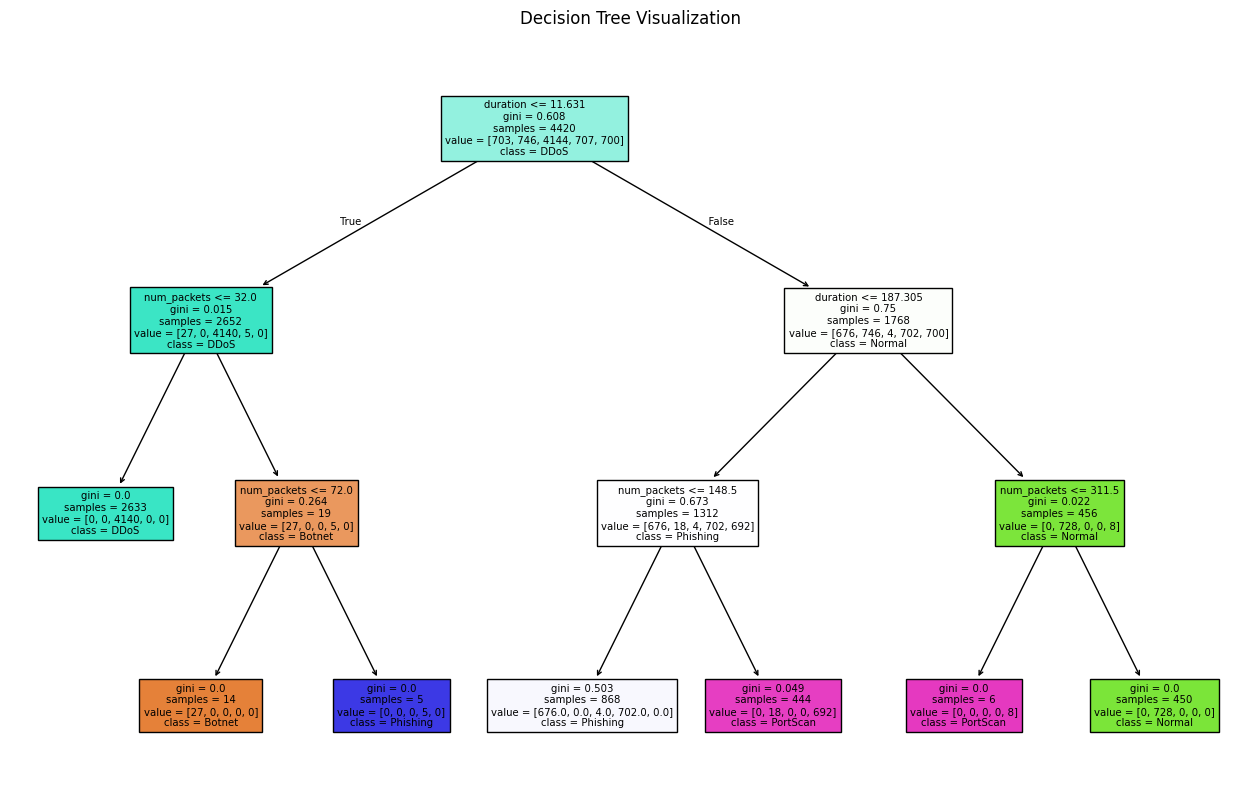

In [25]:
plt.figure(figsize=(16,10))
# Get feature names as a list of strings
feature_names = list(cyber_attack_df.columns[:-1])

# Visualizing a single tree from Random Forest
estimator = rf_clf.estimators_[0]  # choosing the first tree

plot_tree(estimator,
          feature_names=feature_names,  # Use the list of strings
          class_names=cyber_attack_df['attack_type'].unique(), # Use unique class names
          filled=True)
plt.title('Decision Tree Visualization')
plt.show()

#**Evaluating Decision Tree Performance**

In [26]:
from sklearn.metrics import classification_report
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
report = classification_report(y_test, y_pred_rf)
print(report)

Random Forest Accuracy: 0.98
              precision    recall  f1-score   support

      Botnet       0.87      1.00      0.93       307
        DDoS       1.00      1.00      1.00       282
      Normal       0.99      1.00      1.00      1820
    Phishing       1.00      0.82      0.90       303
    PortScan       1.00      1.00      1.00       288

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



#**Feature Importance Analysis**

Feature Importances:
num_packets: 0.3522
duration: 0.2442
num_connections: 0.2138
dst_bytes: 0.1132
src_bytes: 0.0766
protocol_type: 0.0001


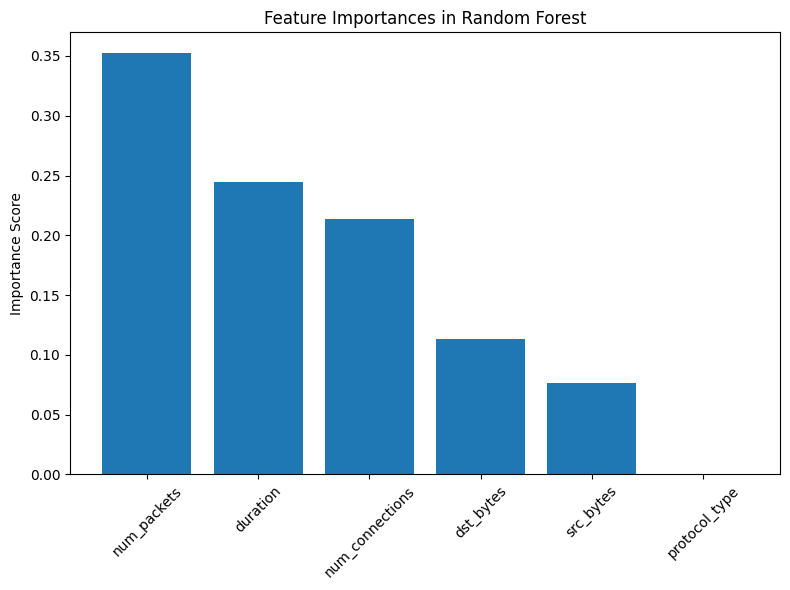

In [27]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature Importances:")
for idx in indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

# Visualize Feature Importance
plt.figure(figsize=(8, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# ✅ Guide Questions - Programming Assignment 5

---

## 1. Preprocessing

### ➤ How did you handle missing values in numerical features?
- Missing values in numerical features were handled by:
    - **Mean Imputation**: For continuous features (e.g., `duration`, `src_bytes`, `dst_bytes`), missing values were filled with the mean of the respective column based on the attack_type.
    - This ensures that the missing values do not distort the distribution of the data.

---

### ➤ Why is there a need to encode the `protocol_type` feature, and which encoding method can be used?
- The `protocol_type` feature is categorical and machine learning models cannot directly interpret categorical values.
- Encoding is necessary to transform it into numerical values that the model can process.
- **One-Hot Encoding** was used for this task, as it creates binary columns for each protocol type (`TCP`, `UDP`, `ICMP`), preventing the model from misinterpreting the numerical relationship between them.

---

## 2. Model Training

### ➤ How did you address class imbalance in the dataset?
 -implicitly addressed class imbalances during the mean imputation step. By calculating and applying the mean values based on the attack_type groups, you effectively gave more weight to each individual sample in minority classes.

-Here's why this can contribute to addressing class imbalance:

1. Preserving Class-Specific Characteristics: When calculating means for imputation, each attack type is considered separately. This ensures that the imputed values are more representative of the specific characteristics of each attack type, even for minority classes.

2. Avoiding Bias towards Majority Class: If you had used the overall mean (ignoring attack types), the imputed values would have been heavily influenced by the majority class. By using attack_type-specific means, you prevent the imputed values from being skewed towards the dominant class, thus indirectly accounting for class imbalance.

---

### ➤ What hyperparameters of the Random Forest did you tune, and why?
- The following hyperparameters were tuned:
    - `n_estimators`: Number of trees in the forest. Increasing this value helps reduce overfitting.
    - `max_depth`: Maximum depth of the trees. Limits the growth of trees to prevent overfitting.
    - `min_samples_split`: Minimum number of samples required to split an internal node. Controls overfitting.
    - `min_samples_leaf`: Minimum number of samples required to be at a leaf node. Prevents small branches.
- Tuning these parameters optimizes the model's performance by balancing bias and variance.

---

### ➤ Why is a pipeline useful for this task?
- A **Pipeline** is useful because:
    - It streamlines the preprocessing and model training steps into a single workflow.
    - It prevents data leakage by ensuring that transformations like scaling and encoding are applied consistently across training and testing data.
    - It simplifies the code and makes the workflow more modular and readable.

---

## 3. Evaluation

### ➤ Why is accuracy alone insufficient to evaluate this model?
- In imbalanced datasets, accuracy can be misleading.
- For example, if the majority class makes up 90% of the data, a model predicting only the majority class would achieve 90% accuracy, even though it fails to classify minority classes.
- Therefore, **precision**, **recall**, and **F1-score** are better metrics, as they provide insights into how well the model handles both majority and minority classes.

---

### ➤ Which attack type was hardest to classify, and why might this be?
- The **DDos** and **Phishing** are proven to be similarly difficult to classify, with an almost equal polar differences in that DDos raises more false positives and Phishing with more false negatives.
-This could be because of the low number of samples and similar numbers to normal traffic.

---

### ➤ How would you improve the model’s performance on minority classes?
- To improve performance on minority classes:
    - Use **more sophisticated resampling techniques** like ADASYN or Balanced Random Forest.
    - Apply **cost-sensitive learning** to penalize misclassification of minority classes more heavily.
    - Use **ensemble methods** (e.g., XGBoost) or model stacking to enhance minority class detection.
    - Increase the dataset size by generating synthetic samples or collecting more data.

---

## 4. Interpretation

### ➤ Which features were most important for classification? Does this align with real-world attack patterns?
- The most important features based on the Random Forest's feature importance analysis were:
- num_packets (Number of Packets):

        - Real-World Alignment: High packet counts are a common characteristic of many cyberattacks, particularly those involving network flooding or denial-of-service (DDoS) attempts. Attackers flood the target with a large number of packets to overwhelm its resources and disrupt its operations.
        Example Attacks: DDoS (various types like SYN floods, UDP floods, ICMP floods), network scans (though less intense than dedicated port scans).

- duration (Connection Duration):

        - Real-World Alignment: Unusually long connection durations can be a sign of malicious activity, such as port scanning, slowloris attacks, or attempts to maintain persistent access to a target system.
        Example Attacks: Port scans (especially stealthy or comprehensive scans), slowloris attacks (which keep connections open for extended periods), botnet command-and-control communication.

- num_connection (Connection Duration):

        - Real-World Alignment: Cyberattacks often involve establishing a large number of connections to a target system or network within a short period. This could be for:
            -Scanning for vulnerabilities: Attackers might initiate numerous connections to probe different ports and services looking for weaknesses.
            -Denial-of-service (DoS) attacks: Flooding a target with a high volume of connections can overwhelm its resources and disrupt services.
            -Botnet activity: Botnets often involve many compromised devices connecting to a command-and-control server to receive instructions or participate in coordinated attacks.

- dst_bytes (Destination Bytes):

        - Real-World Alignment: Large amounts of data being transferred to a specific destination can indicate data exfiltration, malware downloads, or command-and-control communication associated with botnets or other malicious activities.
        Example Attacks: Data exfiltration (stealing sensitive data), malware downloads (transferring malicious code to the target), botnet communication (receiving instructions or sending data back to the attacker).

- src_bytes (Source Bytes):

        - Real-World Alignment: High volumes of data originating from a particular source can be a sign of DDoS attacks, botnet activity, or attempts to flood a target with traffic.
        Example Attacks: DDoS (especially volumetric attacks), botnet communication (sending spam or participating in coordinated attacks), network scans (though less pronounced than destination bytes).
---

### ➤ How would you explain the model’s decision-making process to a non-technical team?
- The model makes decisions by:
    - Analyzing **patterns in network traffic** (e.g., packet volume, connection frequency).
    - It uses **decision trees** to repeatedly split the data based on these features.
    - The majority vote from multiple trees determines the final classification.
- For example:
    - If the number of packets is unusually high, the model may classify the traffic as a **DDoS attack**.
    - If the connection frequency is irregular, it might detect **PortScan** activity.

---

## 5. Application

### ➤ What steps would you take to deploy this model in a real-time network monitoring system?
- Steps for deployment:
    1. **Model Serialization:** Save the trained model using `joblib` or `pickle`.
    2. **Build an API:** Use `Flask` or `FastAPI` to create a RESTful API that accepts network traffic data.
    3. **Real-time Inference:** Stream live traffic data through the API for real-time classification.
    4. **Monitoring and Retraining:** Continuously monitor model performance and retrain with new data periodically.

---

### ➤ How would you handle new attack types not present in the training data?
- To handle new attack types:
    - Use **online learning** techniques to incrementally update the model.
    - Implement **anomaly detection** models (e.g., Isolation Forest) alongside the classifier to detect unknown attack patterns.
    - Regularly retrain the model with updated datasets containing the latest attack types.
